# Technical analysis with python

## Charts and indicators

In [44]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.offline as pyo
from pandas_datareader import data
import yfinance as yf
from pandas.tseries.frequencies import to_offset # used for changing the index in the time series shuffle to weekly information

### Loading financial data from the web

In [2]:
start = "2010-01-01"
end = "2020-12-31"

In [3]:
symbol = ["MSFT", "GE", "AAPL"]

In [4]:
df = yf.download(tickers=symbol, start=start)#, end=end)
df.head()

[*********************100%%**********************]  3 of 3 completed


Price      Adj Close                           Close                        \
Ticker          AAPL         GE       MSFT      AAPL         GE       MSFT   
Date                                                                         
2010-01-04  6.461976  54.075989  23.389406  7.643214  74.043159  30.950001   
2010-01-05  6.473149  54.356014  23.396952  7.656429  74.426552  30.959999   
2010-01-06  6.370185  54.075989  23.253374  7.534643  74.043159  30.770000   
2010-01-07  6.358409  56.876038  23.011541  7.520714  77.877106  30.450001   
2010-01-08  6.400680  58.101059  23.170240  7.570714  79.554459  30.660000   

Price           High                             Low                        \
Ticker          AAPL         GE       MSFT      AAPL         GE       MSFT   
Date                                                                         
2010-01-04  7.660714  74.953720  31.100000  7.585000  72.605423  30.590000   
2010-01-05  7.699643  75.097496  31.100000  7.616071  74.043159  30.639999   
2010-01-06  7.686786  74.857872  31.080000  7.526786  73.995232  30.520000   
2010-01-07  7.571429  78.979370  30.700001  7.466071  73.947311  30.190001   
2010-01-08  7.571429  79.985779  30.879999  7.466429  77.972954  30.240000   

Price           Open                           Volume                      
Ticker          AAPL         GE       MSFT       AAPL        GE      MSFT  
Date                                                                       
2010-01-04  7.622500  72.940895  30.620001  493729600  13997032  38409100  
2010-01-05  7.664286  74.091080  30.850000  601904800  13469263  49749600  
2010-01-06  7.656429  74.426552  30.879999  552160000  11573422  58182400  
2010-01-07  7.562500  74.186928  30.629999  477131200  38701038  50559700  
2010-01-08  7.510714  78.164658  30.280001  447610800  24019636  51197400

In [5]:
# df.to_csv("stocks.csv")
#df =  pd.read_csv("stocks.csv", header=[0,1], index_col=0, parse_dates=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3671 entries, 2010-01-04 to 2024-08-05
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  3671 non-null   float64
 1   (Adj Close, GE)    3671 non-null   float64
 2   (Adj Close, MSFT)  3671 non-null   float64
 3   (Close, AAPL)      3671 non-null   float64
 4   (Close, GE)        3671 non-null   float64
 5   (Close, MSFT)      3671 non-null   float64
 6   (High, AAPL)       3671 non-null   float64
 7   (High, GE)         3671 non-null   float64
 8   (High, MSFT)       3671 non-null   float64
 9   (Low, AAPL)        3671 non-null   float64
 10  (Low, GE)          3671 non-null   float64
 11  (Low, MSFT)        3671 non-null   float64
 12  (Open, AAPL)       3671 non-null   float64
 13  (Open, GE)         3671 non-null   float64
 14  (Open, MSFT)       3671 non-null   float64
 15  (Volume, AAPL)     3671 non-null   int64  
 16  (Volum

In [7]:
# df.columns = pd.MultiIndex.from_tuples(df.columns)
# df.head()

In [8]:
df.Close[-5:]

Ticker            AAPL          GE        MSFT
Date                                          
2024-07-30  218.800003  167.479996  422.920013
2024-07-31  222.080002  170.199997  418.350006
2024-08-01  218.360001  169.750000  417.109985
2024-08-02  219.860001  160.279999  408.489990
2024-08-05  210.210007  158.979996  394.049988

### Plot simple line graph

<AxesSubplot:xlabel='Date'>

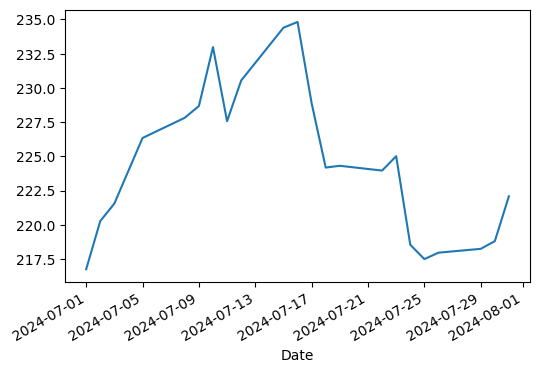

In [9]:
# df.Close.GE.plot(figsize=(8,6))
df.loc["2024-07", ("Close", "AAPL")].plot(figsize=(6,4))

### Plot interactive line chart

In [10]:
cf.set_config_file(offline=True)
df.loc['2024-07':, ('Close', 'AAPL')].iplot()

In [18]:
df.Close.iplot(fill=True)

In [19]:
cf.colors.scales()

In [25]:
df.Close.iplot(fill=True, colorscale="rdylgn")

In [26]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [27]:
df.Close.iplot(fill=True, colorscale='rdylbu', theme='solar')

In [28]:
df.Close.iplot(fill=True, colorscale='rdylbu', theme='solar', title='US Stocks', xTitle='Time', yTitle='Stock price')

In [32]:
df.Close[['GE', 'AAPL']].iplot(kind='spread', fill=True, colorscale='rdylbu', 
                               theme='ggplot', title='GE vs. AAPL', xTitle='Time', yTitle='Stock price')

c:\Users\wrosales\Anaconda3\envs\stockAI\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

c:\Users\wrosales\Anaconda3\envs\stockAI\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



### Candlestick and OHLC Bar Charts

In [34]:
aapl = df.swaplevel(axis=1).AAPL.copy()
aapl

Price        Adj Close       Close        High         Low        Open  \
Date                                                                     
2010-01-04    6.461976    7.643214    7.660714    7.585000    7.622500   
2010-01-05    6.473149    7.656429    7.699643    7.616071    7.664286   
2010-01-06    6.370185    7.534643    7.686786    7.526786    7.656429   
2010-01-07    6.358409    7.520714    7.571429    7.466071    7.562500   
2010-01-08    6.400680    7.570714    7.571429    7.466429    7.510714   
...                ...         ...         ...         ...         ...   
2024-07-30  218.800003  218.800003  220.330002  216.119995  219.190002   
2024-07-31  222.080002  222.080002  223.820007  220.630005  221.440002   
2024-08-01  218.360001  218.360001  224.479996  217.020004  224.369995   
2024-08-02  219.860001  219.860001  225.600006  217.710007  219.149994   
2024-08-05  210.210007  210.210007  213.470001  196.210007  199.139999   

Price          Volume  
Date                   
2010-01-04  493729600  
2010-01-05  601904800  
2010-01-06  552160000  
2010-01-07  477131200  
2010-01-08  447610800  
...               ...  
2024-07-30   41643800  
2024-07-31   50036300  
2024-08-01   62501000  
2024-08-02   98480100  
2024-08-05   76246307  

[3671 rows x 6 columns]

In [40]:
aapl.loc['2024-1':].iplot(kind='candle')

In [37]:
aapl.loc['2024-07':].iplot(kind='ohlc')

### Change Bar Chart Granularity

In [41]:
weekly = aapl.resample("W-Fri").ohlc()
weekly.head()

Price      Adj Close                                   Close            \
                open      high       low     close      open      high   
Date                                                                     
2010-01-08  6.461976  6.473149  6.358409  6.400680  7.643214  7.656429   
2010-01-15  6.344217  6.360521  6.218004  6.218004  7.503929  7.523214   
2010-01-22  6.493077  6.493077  5.971008  5.971008  7.680000  7.680000   
2010-01-29  6.131646  6.276884  5.799201  5.799201  7.252500  7.424286   
2010-02-05  5.879822  6.015698  5.798899  5.901863  6.954643  7.115357   

Price                               High            ...       Low            \
                 low     close      open      high  ...       low     close   
Date                                                ...                       
2010-01-08  7.520714  7.570714  7.660714  7.699643  ...  7.466071  7.466429   
2010-01-15  7.354643  7.354643  7.607143  7.607143  ...  7.289286  7.352500   
2010-01-22  7.062500  7.062500  7.685357  7.698214  ...  7.041429  7.041429   
2010-01-29  6.859286  6.859286  7.310714  7.632500  ...  6.794643  6.794643   
2010-02-05  6.858929  6.980714  7.000000  7.150000  ...  6.816071  6.816071   

Price           Open                                    Volume              \
                open      high       low     close        open        high   
Date                                                                         
2010-01-08  7.622500  7.664286  7.510714  7.510714   493729600   601904800   
2010-01-15  7.600000  7.600000  7.423929  7.533214   462229600   605892000   
2010-01-22  7.440357  7.675357  7.385000  7.385000   730007600   881767600   
2010-01-29  7.232500  7.387500  7.181429  7.181429  1065699600  1867110000   
2010-02-05  6.870357  7.026071  6.870357  6.879643   749876400   850306800   

Price                               
                   low       close  
Date                                
2010-01-08   447610800   447610800  
2010-01-15   432894000   594067600  
2010-01-22   608154400   881767600  
2010-01-29  1065699600  1245952400  
2010-02-05   615328000   850306800  

[5 rows x 24 columns]

In [42]:
weekly = aapl.resample('W-Fri').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

weekly.head()

Price           Open      High       Low     Close
Date                                              
2010-01-08  7.622500  7.699643  7.466071  7.570714
2010-01-15  7.600000  7.607143  7.289286  7.354643
2010-01-22  7.440357  7.698214  7.041429  7.062500
2010-01-29  7.232500  7.632500  6.794643  6.859286
2010-02-05  6.870357  7.150000  6.816071  6.980714

In [45]:
weekly.index = weekly.index - to_offset('4d')
weekly.head()

Price           Open      High       Low     Close
Date                                              
2010-01-04  7.622500  7.699643  7.466071  7.570714
2010-01-11  7.600000  7.607143  7.289286  7.354643
2010-01-18  7.440357  7.698214  7.041429  7.062500
2010-01-25  7.232500  7.632500  6.794643  6.859286
2010-02-01  6.870357  7.150000  6.816071  6.980714

In [47]:
weekly.loc['2024-01':].iplot(kind='candle')

### Volume Charts

In [48]:
aapl.head()

Price       Adj Close     Close      High       Low      Open     Volume
Date                                                                    
2010-01-04   6.461976  7.643214  7.660714  7.585000  7.622500  493729600
2010-01-05   6.473149  7.656429  7.699643  7.616071  7.664286  601904800
2010-01-06   6.370185  7.534643  7.686786  7.526786  7.656429  552160000
2010-01-07   6.358409  7.520714  7.571429  7.466071  7.562500  477131200
2010-01-08   6.400680  7.570714  7.571429  7.466429  7.510714  447610800

In [49]:
qf = cf.QuantFig(df = aapl.loc['2024-07':])

In [51]:
qf.add_volume(colorchange=False)

In [52]:
qf.iplot(title='AAPL', name='AAPL')